In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
from matplotlib import pyplot as plt

Shape of Dataset: (1348, 2914)


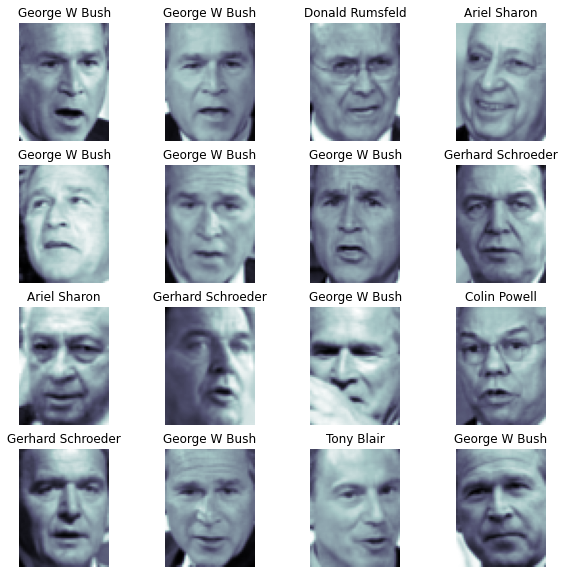

In [3]:
faces_dataset = fetch_lfw_people(min_faces_per_person = 60)
print("Shape of Dataset: {}".format(faces_dataset.data.shape))

index = np.random.randint(0, faces_dataset.data.shape[0], size=16)
plt.rcParams['figure.figsize']=(10, 10)

i = 0
fig, axs = plt.subplots(4, 4)
for r in range(4):
    for c in range(4):
        axs[r, c].imshow(faces_dataset.images[index[i]], cmap=plt.cm.bone)
        axs[r, c].set_title(str(faces_dataset.target_names[faces_dataset.target[index[i]]]))
        axs[r, c].axis('off')
        i+=1


### PCA on the dataset to find the first 150 components, using randomized PCA from `sklearn`

In [4]:
faces_pca = PCA(n_components=150, whiten=True, svd_solver='randomized')
_ = faces_pca.fit(faces_dataset.data)

### Eigenfaces associated with first 25 principal components

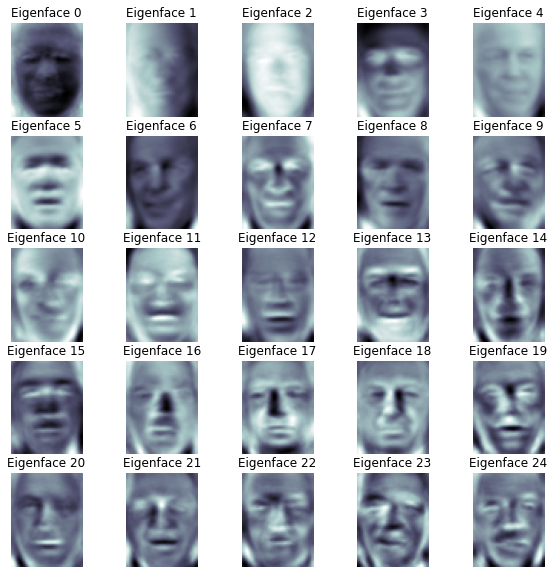

In [6]:
pca_eigenfaces = faces_pca.components_
plt.rcParams['figure.figsize']=(10, 10)

i = 0
fig, axs = plt.subplots(5, 5)
for r in range(5):
    for c in range(5):
        axs[r, c].imshow(pca_eigenfaces[i].reshape(faces_dataset.images.shape[1:]), cmap=plt.cm.bone)
        axs[r, c].set_title(str("Eigenface {}").format(i))
        axs[r, c].axis('off')
        i+=1


### Reconstructing a few random faces using the first 150 Principal Components

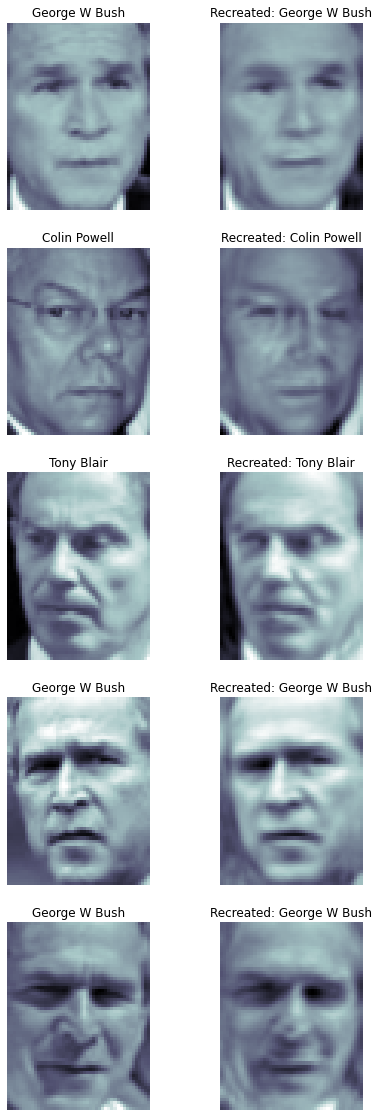

In [30]:
plt.rcParams['figure.figsize']=(7, 20)
index = np.random.randint(0, faces_dataset.data.shape[0], size=5)

i = 0
fig, axs = plt.subplots(5, 2)
for r in range(5):
    c = 0
    axs[r, c].imshow(faces_dataset.images[index[i]], cmap=plt.cm.bone)
    axs[r, c].set_title(str(faces_dataset.target_names[faces_dataset.target[index[i]]]))
    axs[r, c].axis('off')

    pca_transformed_face = faces_pca.transform(faces_dataset.images[index[i]].reshape(1, -1))
    axs[r, c+1].imshow(faces_pca.inverse_transform(pca_transformed_face).reshape(faces_dataset.images.shape[1:]), cmap=plt.cm.bone)
    axs[r, c+1].set_title(str("Recreated: " + faces_dataset.target_names[faces_dataset.target[index[i]]]))
    axs[r, c+1].axis('off')
    i+=1


